In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

from PIL import Image

from tensorflow import keras
import tensorflow.keras.layers as k

from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cell-images-for-detecting-malaria


In [ ]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(4)

In [ ]:
image_dir = '/kaggle/input/cell-images-for-detecting-malaria/cell_images'
size=64
dataset=[]
label=[]

parasitized_images = os.listdir(image_dir + '/Parasitized/')

In [ ]:
len(parasitized_images)

13780

In [ ]:
parasitized_images[0]

'C99P60ThinF_IMG_20150918_141001_cell_93.png'

In [ ]:
for i,img in enumerate(parasitized_images):
  if img.lower().endswith('.png'):
    image=cv2.imread(image_dir+'/Parasitized/'+img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image=Image.fromarray(image,'RGB')
    image=image.resize((size,size))

    dataset.append(np.array(image))
    label.append(0)

/tmp/ipython-input-1446458341.py:6: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image=Image.fromarray(image,'RGB')


In [ ]:
uninfected_images = os.listdir(image_dir + '/Uninfected/')
for i,img in enumerate(tqdm(uninfected_images)):
  if img.lower().endswith('.png'):
    image=cv2.imread(image_dir+'/Uninfected/'+img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image=Image.fromarray(image,'RGB')
    image=image.resize((size,size))

    dataset.append(np.array(image))
    label.append(1)

  0%|          | 0/13780 [00:00<?, ?it/s]

/tmp/ipython-input-4104922942.py:7: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image=Image.fromarray(image,'RGB')


In [ ]:
len(uninfected_images)

13780

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=4)

CNN ARCHITECTURE

In [ ]:
INPUT=(size,size,3)

input=k.Input(shape=INPUT)

conv1=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(input)
max_pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(max_pool1)
drop1=k.Dropout(rate=0.25)(norm1)

conv2=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(drop1)
max_pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(max_pool2)
drop2=k.Dropout(rate=0.25)(norm2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512,activation='relu')(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.25)(norm3)

hidden2=k.Dense(256,activation='relu')(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.25)(norm4)

output=k.Dense(2,activation='softmax')(drop4)

In [ ]:

model=keras.Model(inputs=input,outputs=output)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

None


In [ ]:
history=model.fit(np.array(x_train),y_train,batch_size=64,epochs=10,validation_split=0.1,verbose=1)

Epoch 1/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.6928 - loss: 0.6968 - val_accuracy: 0.8159 - val_loss: 0.8043
Epoch 2/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9017 - loss: 0.2613 - val_accuracy: 0.8707 - val_loss: 0.5801
Epoch 3/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9232 - loss: 0.2143 - val_accuracy: 0.9188 - val_loss: 0.2646
Epoch 4/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9323 - loss: 0.1871 - val_accuracy: 0.9243 - val_loss: 0.1938
Epoch 5/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9411 - loss: 0.1690 - val_accuracy: 0.9465 - val_loss: 0.1486
Epoch 6/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9442 - loss: 0.1520 - val_accuracy: 0.9497 - val_loss: 0.1546
Epoch 7/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9525 - loss: 0.1382 - val_accuracy: 0.9351 - val_loss: 0.1663
Epoch 8/10
311/311 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9539 - loss: 0.1289 - val_accura

In [ ]:
print("Test Accuracy: {:2f}%".format(model.evaluate(np.array(x_test),np.array(y_test))[1]*100))

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9575 - loss: 0.1342
Test Accuracy: 95.482582%


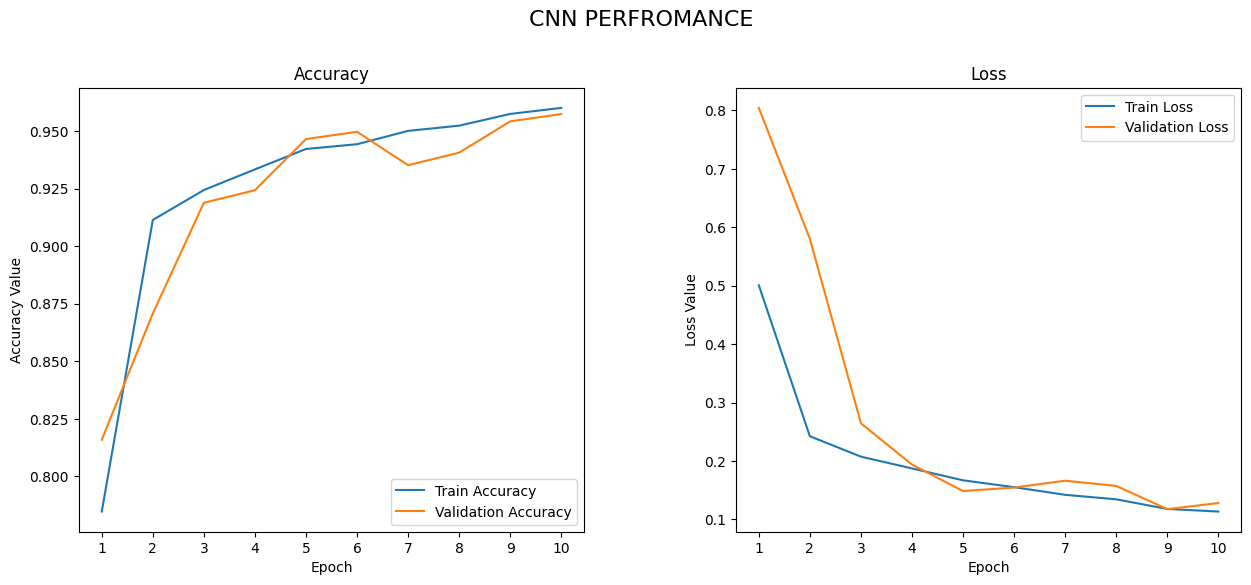

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
t=f.suptitle('CNN PERFROMANCE',fontsize=16)
f.subplots_adjust(top=0.85,wspace=0.3)

max_epoch=len(history.history['accuracy'])+1
epoch_list=list(range(1,max_epoch))

ax1.plot(epoch_list,history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(1,max_epoch,1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1=ax1.legend(loc='lower right')

ax2.plot(epoch_list,history.history['loss'],label='Train Loss')
ax2.plot(epoch_list,history.history['val_loss'],label='Validation Loss')
ax2.set_xticks(np.arange(1,max_epoch,1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2=ax2.legend(loc='upper right')
